In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

基于模型的特征选择使用一个监督学习模型来判断每个特征的重要性，并且仅保留最重要的特征。用于特征选择的监督模型不需要与用于最终监督建模的模型相同。特征选择模型需要对每个特征提供某种重要性度量，以便用这个度量对特征进行筛选。决策树和基于决策树的模型提供了`feature_importances_`属性，可以直接编码每个特征的重要性。线性模型系数的绝对值也可以用于表示特征重要性。

In [3]:
cancer = load_breast_cancer()

In [4]:
# 获得确定性的随机数
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))

In [5]:
# 向数据中添加噪声特征
# 前30个特征来自数据集，后50个是噪声
X_w_noise = np.hstack([cancer.data,noise])
X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=0.5)

In [7]:
#SelectFormModel类选出重要性度量(由监督模型提供)大于给定阀值的所有特征。为了得到可以与单变量特征选择进行对比的结果，我们使用中位数作为阀值，
# 这样就可以选择一半特征。我们用包含100棵树的随机森林分类器来计算特征重要性
select = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold='median')
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)

print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


Text(0.5,0,'Sample Index')

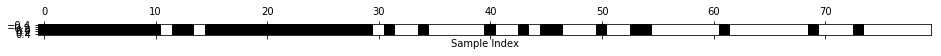

In [12]:
#再次查看选中的特征
mask = select.get_support()
# 将遮罩可视化，黑色为True，白色为False
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample Index")

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1,y_train).score(X_test_l1,y_test)
print(score)

0.9508771929824561
